## Experiement 1 Part 2: Logistic Regression
## Nikita Chitre
## Roll No 4
## Batch A

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data from CSV file

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/horse-colic.csv', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,5,4,4,?,?,?,3,5,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,3,4,2,?,?,?,4,2,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,3,3,1,?,?,?,1,1,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,2,4,4,1,2,5.00,3,?,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,?,?,?,?,?,?,?,?,74.00,7.40,?,?,2,2,4300,0,0,2


From the above dataset, we can see that the Missing values are encoded as ?. But we don't know if these values have been considered as NULL in Pandas Dataframe or not.

# Data Preprocessing 

## Data Cleaning

### Step 1: Encoding as NaN value

Checking the data type of each column in dataset. Here we can see that all the columns are appearing to be Not Null even though they have ? values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       300 non-null    object
 1   1       300 non-null    int64 
 2   2       300 non-null    int64 
 3   3       300 non-null    object
 4   4       300 non-null    object
 5   5       300 non-null    object
 6   6       300 non-null    object
 7   7       300 non-null    object
 8   8       300 non-null    object
 9   9       300 non-null    object
 10  10      300 non-null    object
 11  11      300 non-null    object
 12  12      300 non-null    object
 13  13      300 non-null    object
 14  14      300 non-null    object
 15  15      300 non-null    object
 16  16      300 non-null    object
 17  17      300 non-null    object
 18  18      300 non-null    object
 19  19      300 non-null    object
 20  20      300 non-null    object
 21  21      300 non-null    object
 22  22      300 non-null    ob

##### Encoding ? as NaN so that they will be considered as missing values. Pandas Read Excel function has an option of encoding a certain value as NaN by using na_values parameter

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/horse-colic.csv',na_values= ['?'], header=None)

All ? values have been converted to NaN

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In the above dataset we can also see that the columns have not been named. Hence we will rename the columns based on data description

In [ ]:
columns = ['surgery',	'age',	'hospital_number',	'rectal_temp',	'pulse',	'respiratory_rate',	'temp_of_extremities',	'peripheral_pulse',	'mucous_membrane',	'capillary_refill_time',	'pain',	'peristalsis',	'abdominal_distention','nasogastric_tube',	'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces','abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1',	'lesion_2',	'lesion_3', 'cp_data' ]


In [ ]:
df.columns = columns

Dataframe after renaming the columns

In [ ]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [ ]:
df.shape

(300, 28)

The dataframe has 300 rows and 28 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    float64
 1   age                    300 non-null    int64  
 2   hospital_number        300 non-null    int64  
 3   rectal_temp            240 non-null    float64
 4   pulse                  276 non-null    float64
 5   respiratory_rate       242 non-null    float64
 6   temp_of_extremities    244 non-null    float64
 7   peripheral_pulse       231 non-null    float64
 8   mucous_membrane        253 non-null    float64
 9   capillary_refill_time  268 non-null    float64
 10  pain                   245 non-null    float64
 11  peristalsis            256 non-null    float64
 12  abdominal_distention   244 non-null    float64
 13  nasogastric_tube       196 non-null    float64
 14  nasogastric_reflux     194 non-null    float64
 15  nasoga

In the above data description we can see that many columns have missing values 

#### Percentage of NaN values for each column

In [ ]:
length = len(df)
for col in df.columns:
    print(f'{col}:   {((df[col].isna().sum()/length)*100).round(2)} %')

surgery:   0.33 %
age:   0.0 %
hospital_number:   0.0 %
rectal_temp:   20.0 %
pulse:   8.0 %
respiratory_rate:   19.33 %
temp_of_extremities:   18.67 %
peripheral_pulse:   23.0 %
mucous_membrane:   15.67 %
capillary_refill_time:   10.67 %
pain:   18.33 %
peristalsis:   14.67 %
abdominal_distention:   18.67 %
nasogastric_tube:   34.67 %
nasogastric_reflux:   35.33 %
nasogastric_reflux_ph:   82.33 %
rectal_exam_feces:   34.0 %
abdomen:   39.33 %
packed_cell_volume:   9.67 %
total_protein:   11.0 %
abdomo_appearance:   55.0 %
abdomo_protein:   66.0 %
outcome:   0.33 %
surgical_lesion:   0.0 %
lesion_1:   0.0 %
lesion_2:   0.0 %
lesion_3:   0.0 %
cp_data:   0.0 %


#### Dropping nasogastric_reflux_ph, abdomo_protein column since they have more than 60% missing values

In [ ]:
df_clean = df.drop(['nasogastric_reflux_ph', 'abdomo_protein'], axis=1)

In [ ]:
df_clean.isna().sum()

surgery                    1
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
outcome                    1
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

#### Separate Categorical and Numeric Columns

In [ ]:
cat_col = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 
           'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 
           'abdomen', 'abdomo_appearance', 'outcome', 'surgical_lesion', 'cp_data']

Converting the datatype of categorical columns to object

In [ ]:
for col in cat_col:
    df_clean[col] = df_clean[col].astype('object') 

In [ ]:
num_col = ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 
            'lesion_1', 'lesion_2', 'lesion_3']

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    300 non-null    object 
 2   hospital_number        300 non-null    int64  
 3   rectal_temp            240 non-null    float64
 4   pulse                  276 non-null    float64
 5   respiratory_rate       242 non-null    float64
 6   temp_of_extremities    244 non-null    object 
 7   peripheral_pulse       231 non-null    object 
 8   mucous_membrane        253 non-null    object 
 9   capillary_refill_time  268 non-null    object 
 10  pain                   245 non-null    object 
 11  peristalsis            256 non-null    object 
 12  abdominal_distention   244 non-null    object 
 13  nasogastric_tube       196 non-null    object 
 14  nasogastric_reflux     194 non-null    object 
 15  rectal

### Handling Missing Values

#### Handling missing values of Categorical variables 

In [ ]:
df_clean[cat_col].isna().sum()

surgery                    1
age                        0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
abdomo_appearance        165
outcome                    1
surgical_lesion            0
cp_data                    0
dtype: int64

##### First drop the row in which Outcome variable is missing

In [ ]:
df_clean = df_clean[ ~ df_clean['outcome'].isna()].copy()

In [ ]:
df_clean[cat_col].isna().sum()

surgery                    0
age                        0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
abdomo_appearance        165
outcome                    0
surgical_lesion            0
cp_data                    0
dtype: int64

##### Fill Missing Values of Categorical variables by Mode with respect to outcome variable. This is because columns such as Pulse, abdominal distention etc will be dependent on the Outcome variable

Filling missing values of categorical variables by Mode wrt Outcome variable

In [ ]:
df_clean['outcome'] = df_clean['outcome'].astype('category').cat.codes

for col in cat_col:

    m1 = (df_clean['outcome'] == 0) 
    m2 = (df_clean['outcome'] == 1)
    m3 = (df_clean['outcome'] == 2)

    df_clean.loc[m1,col] = df_clean.loc[m1,col].fillna(df_clean.loc[m1,col].mode()[0])
    df_clean.loc[m2,col] = df_clean.loc[m2,col].fillna(df_clean.loc[m2,col].mode()[0])
    df_clean.loc[m3,col] = df_clean.loc[m3,col].fillna(df_clean.loc[m3,col].mode()[0])
    df_clean[col] = df_clean[col].astype('category').cat.codes

#### Now the missing values of all categorical variables have been handled 

In [ ]:
df_clean[cat_col].isna().sum()

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
outcome                  0
surgical_lesion          0
cp_data                  0
dtype: int64

In [ ]:
df_clean.describe()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
count,299.000000,299.000000,2.990000e+02,239.000000,275.000000,241.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,270.000000,266.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.397993,0.080268,1.087733e+06,38.168619,72.000000,30.460581,1.254181,0.986622,1.715719,0.284281,2.006689,1.953177,1.200669,0.839465,0.377926,1.618729,3.204013,46.307407,24.274436,0.806020,0.551839,0.364548,3659.709030,90.528428,7.387960,0.668896
std,0.490305,0.272162,1.532032e+06,0.733744,28.646219,17.666102,1.053410,1.032925,1.599954,0.466445,1.261174,0.918389,1.061783,0.538125,0.705430,1.354256,1.326745,10.436743,27.364194,0.860679,0.737187,0.482110,5408.472421,650.637139,127.749768,0.471399
min,0.000000,0.000000,5.184760e+05,35.400000,30.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.289040e+05,37.800000,48.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,3.000000,38.000000,6.500000,0.000000,0.000000,0.000000,2111.500000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.303010e+05,38.200000,64.000000,25.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000,4.000000,45.000000,7.500000,1.000000,0.000000,0.000000,2322.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,5.347360e+05,38.500000,88.000000,36.000000,2.000000,2.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,3.000000,4.000000,52.000000,56.750000,2.000000,1.000000,1.000000,3209.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,5.305629e+06,40.800000,184.000000,96.000000,3.000000,3.000000,5.000000,2.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,4.000000,75.000000,89.000000,2.000000,2.000000,1.000000,41110.000000,7111.000000,2209.000000,1.000000


#### Handling Missing values of Numerical Columns

Printing number of missing values for numerical columns

In [ ]:
df_clean[num_col].isna().sum()

hospital_number        0
rectal_temp           60
pulse                 24
respiratory_rate      58
packed_cell_volume    29
total_protein         33
lesion_1               0
lesion_2               0
lesion_3               0
dtype: int64

#### Filling missing values of Rectal_Temp by Median

#### The distribution of the Variable wrt Outcome Variable is necessary to fill missing values

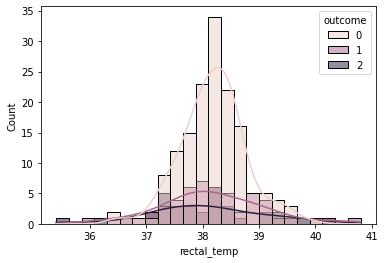

In [ ]:
_ = sns.histplot(data = df_clean, x = 'rectal_temp', hue ='outcome',kde = True)

##### Fill Missing Values by Median with respect to outcome variable. This is because as we can see from the above distribution, the rectal_temp variable is dependent on the Outcome variable

In [ ]:
m1 = (df_clean['outcome'] == 0) 

m2 = (df_clean['outcome'] == 1)

m3 = (df_clean['outcome'] == 2)

df_clean.loc[m1,'rectal_temp'] = df_clean.loc[m1,'rectal_temp'].fillna(df_clean.loc[m1,'rectal_temp'].median())
df_clean.loc[m2,'rectal_temp'] = df_clean.loc[m2,'rectal_temp'].fillna(df_clean.loc[m2,'rectal_temp'].median())
df_clean.loc[m3,'rectal_temp'] = df_clean.loc[m3,'rectal_temp'].fillna(df_clean.loc[m3,'rectal_temp'].median())

In [ ]:
df_clean[num_col].isna().sum()

hospital_number        0
rectal_temp            0
pulse                 24
respiratory_rate      58
packed_cell_volume    29
total_protein         33
lesion_1               0
lesion_2               0
lesion_3               0
dtype: int64

#### Filling missing values of Pulse by Median



#### The distribution of the Variable wrt Outcome Variable is necessary to fill missing values

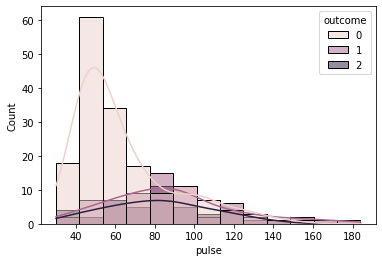

In [ ]:
_ = sns.histplot(data  = df_clean, x = 'pulse' , hue = 'outcome',kde = True)

##### Fill Missing Values by Median with respect to outcome variable. This is because as we can see from the above distribution, the Pulse variable is dependent on the Outcome variable

In [ ]:
m1 = (df_clean['outcome'] == 0) 
m2 = (df_clean['outcome'] == 1)
m3 = (df_clean['outcome'] == 2)


df_clean.loc[m1,'pulse'] = df_clean.loc[m1,'pulse'].fillna(df_clean.loc[m1,'pulse'].median())
df_clean.loc[m2,'pulse'] = df_clean.loc[m2,'pulse'].fillna(df_clean.loc[m2,'pulse'].median())
df_clean.loc[m3,'pulse'] = df_clean.loc[m3,'pulse'].fillna(df_clean.loc[m3,'pulse'].median())

In [ ]:
df_clean[num_col].isna().sum()

hospital_number        0
rectal_temp            0
pulse                  0
respiratory_rate      58
packed_cell_volume    29
total_protein         33
lesion_1               0
lesion_2               0
lesion_3               0
dtype: int64

#### Filling missing values of Respiratory_rate by Mean

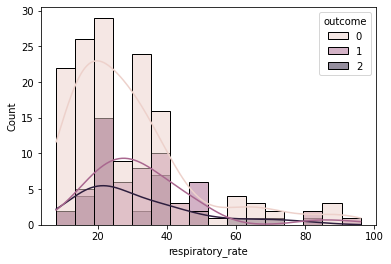

In [ ]:
_ = sns.histplot(data = df_clean, x = 'respiratory_rate', hue ='outcome',kde = True)                                                                   

##### Fill Missing Values by Median with respect to outcome variable. This is because as we can see from the above distribution, the Respiratory Rate variable is dependent on the Outcome variable

In [ ]:
m1 = (df_clean['outcome'] == 0) 
m2 = (df_clean['outcome'] == 1)
m3 = (df_clean['outcome'] == 2)


df_clean.loc[m1,'respiratory_rate'] = df_clean.loc[m1,'respiratory_rate'].fillna(df_clean.loc[m1,'respiratory_rate'].median())
df_clean.loc[m2,'respiratory_rate'] = df_clean.loc[m2,'respiratory_rate'].fillna(df_clean.loc[m2,'respiratory_rate'].median())
df_clean.loc[m3,'respiratory_rate'] = df_clean.loc[m3,'respiratory_rate'].fillna(df_clean.loc[m3,'respiratory_rate'].median())

In [ ]:
df_clean[num_col].isna().sum()

hospital_number        0
rectal_temp            0
pulse                  0
respiratory_rate       0
packed_cell_volume    29
total_protein         33
lesion_1               0
lesion_2               0
lesion_3               0
dtype: int64

#### Filling Missing Values for packed_cell_volume

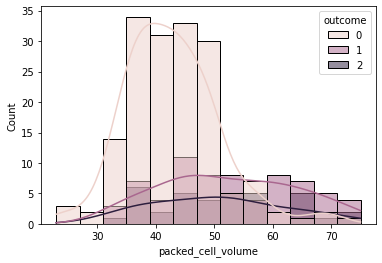

In [ ]:
_ = sns.histplot(data = df_clean,x = 'packed_cell_volume', hue = 'outcome',kde = True)                                                                   

##### Fill Missing Values by Median with respect to outcome variable. This is because as we can see from the above distribution, the Packed_cell_volume variable is dependent on the Outcome variable

In [ ]:
m1 = (df_clean['outcome'] == 0) 
m2 = (df_clean['outcome'] == 1)
m3 = (df_clean['outcome'] == 2)

df_clean.loc[m1,'packed_cell_volume'] = df_clean.loc[m1,'packed_cell_volume'].fillna(df_clean.loc[m1,'packed_cell_volume'].median())
df_clean.loc[m2,'packed_cell_volume'] = df_clean.loc[m2,'packed_cell_volume'].fillna(df_clean.loc[m2,'packed_cell_volume'].median())
df_clean.loc[m3,'packed_cell_volume'] = df_clean.loc[m3,'packed_cell_volume'].fillna(df_clean.loc[m3,'packed_cell_volume'].median())

In [ ]:
df_clean[num_col].isna().sum()

hospital_number        0
rectal_temp            0
pulse                  0
respiratory_rate       0
packed_cell_volume     0
total_protein         33
lesion_1               0
lesion_2               0
lesion_3               0
dtype: int64

#### Filling Missing Values for total_protein by Median

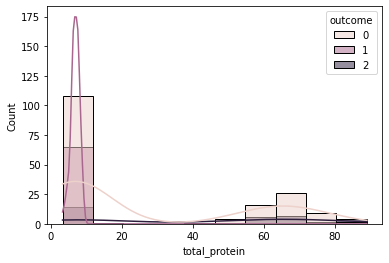

In [ ]:
_ = sns.histplot(data = df_clean, x = 'total_protein', hue = 'outcome',kde = True)                                                                   

##### Fill Missing Values by Median with respect to outcome variable. This is because as we can see from the above distribution, the Total_protein variable is dependent on the Outcome variable

In [ ]:
m1 = (df_clean['outcome'] == 0) 
m2 = (df_clean['outcome'] == 1)
m3 = (df_clean['outcome'] == 2)

df_clean.loc[m1,'total_protein'] = df_clean.loc[m1,'total_protein'].fillna(df_clean.loc[m1,'total_protein'].median())
df_clean.loc[m2,'total_protein'] = df_clean.loc[m2,'total_protein'].fillna(df_clean.loc[m2,'total_protein'].median())
df_clean.loc[m3,'total_protein'] = df_clean.loc[m3,'total_protein'].fillna(df_clean.loc[m3,'total_protein'].median())

#### Now the missing values for all the Numeric columns have been handled

In [ ]:
df_clean[num_col].isna().sum()

hospital_number       0
rectal_temp           0
pulse                 0
respiratory_rate      0
packed_cell_volume    0
total_protein         0
lesion_1              0
lesion_2              0
lesion_3              0
dtype: int64

#### All the missing values have been handled

In [ ]:
df_clean.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

## Data Reduction

In [ ]:
df_clean.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1,0,530101,38.5,66.0,28.0,2,2,2,1,4,3,3,1,0,2,4,45.0,8.4,2,1,1,11300,0,0,1
1,0,0,534817,39.2,88.0,20.0,2,2,3,0,2,3,1,1,0,3,1,50.0,85.0,1,2,1,2208,0,0,1
2,1,0,530334,38.3,40.0,24.0,0,0,2,0,2,2,0,1,0,0,0,33.0,6.7,0,0,1,0,0,0,0
3,0,1,5290409,39.1,164.0,84.0,3,0,5,1,1,3,3,0,1,2,4,48.0,7.2,2,1,0,2208,0,0,0
4,1,0,530255,37.3,104.0,35.0,2,2,5,1,4,2,2,1,0,3,4,74.0,7.4,2,1,1,4300,0,0,1


#### Plotting Correlation matrix to drop uncorrelated features

In [ ]:
corr= df_clean.corr()
core = abs(corr.outcome.sort_values(ascending = False))
core.sort_values(ascending = False)

outcome                  1.000000
abdomo_appearance        0.539502
peripheral_pulse         0.520933
rectal_exam_feces        0.470276
mucous_membrane          0.460641
temp_of_extremities      0.445348
abdominal_distention     0.441105
packed_cell_volume       0.387711
capillary_refill_time    0.342479
pulse                    0.334478
peristalsis              0.315860
pain                     0.252282
surgical_lesion          0.209143
nasogastric_reflux       0.191276
abdomen                  0.169277
surgery                  0.117619
total_protein            0.091794
lesion_2                 0.084915
rectal_temp              0.070797
respiratory_rate         0.065392
lesion_3                 0.043436
lesion_1                 0.041391
cp_data                  0.035073
nasogastric_tube         0.021049
hospital_number          0.004377
age                      0.004083
Name: outcome, dtype: float64

Histogram to understand correlation between variables

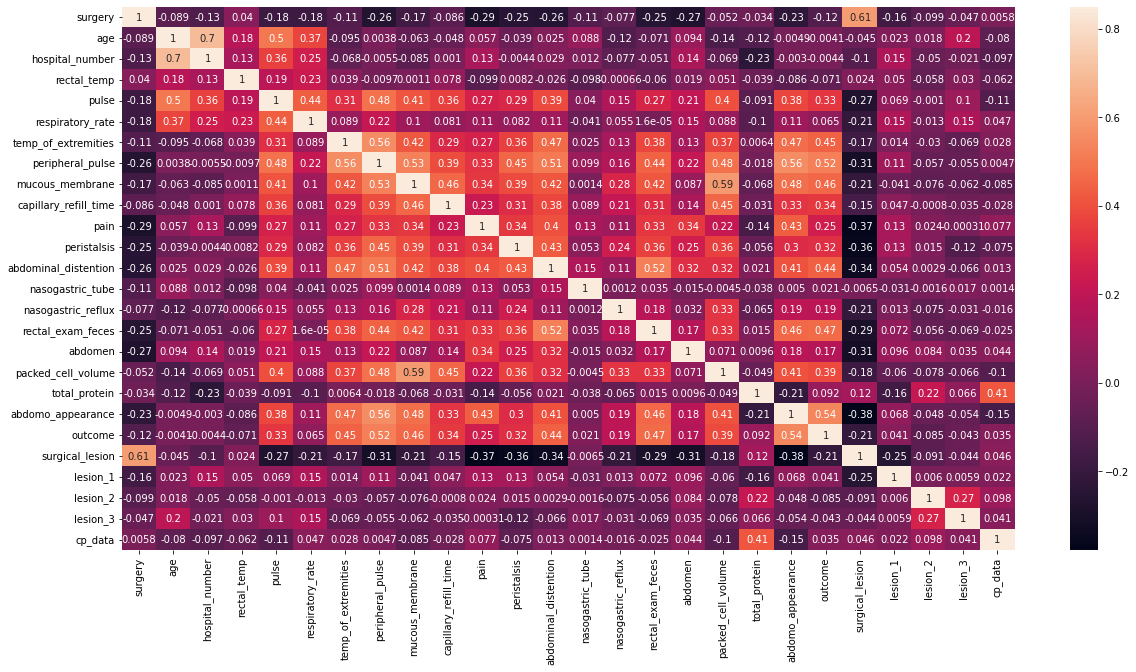

In [ ]:
fig = plt.figure(figsize =(20, 10))

_ = sns.heatmap(df_clean.corr(), annot = True, vmax = 0.85) 

From the correlation matrix we can see that Columns like 'nasogastric_reflux', 'abdomen', 'surgery' ,'total_protein', 'lesion_2', 'respiratory_rate','lesion_1', 'hospital_number', 'age', 'rectal_temp','lesion_3', 'cp_data', 'nasogastric_tube' have very low correlation. So we can drop them       

In [ ]:
df_clean = df_clean.drop(['nasogastric_reflux', 'abdomen', 'surgery' ,           
                          'total_protein', 'lesion_2', 'respiratory_rate',    
                          'lesion_1', 'hospital_number', 'age', 'rectal_temp',       
                          'lesion_3', 'cp_data', 'nasogastric_tube' ],
                         axis=1)
                

In [ ]:
df_clean.shape

(299, 13)

## Data Visualization

### Seeing the distribution of Target variable

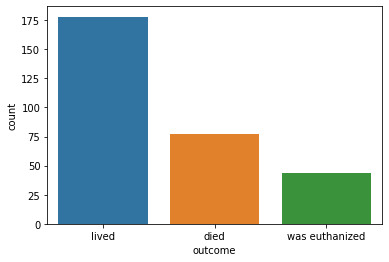

In [ ]:
g = sns.countplot(data=df_clean, x="outcome");
g.set_xticklabels(['lived','died','was euthanized']);

As we can see, this is a multiclass classification problem. Also, most of the samples belong to class 'lived'. Class 'euthanized has least number of samples. 

In [ ]:
df_clean.columns

Index(['pulse', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'rectal_exam_feces', 'packed_cell_volume', 'abdomo_appearance',
       'outcome', 'surgical_lesion'],
      dtype='object')

#### Finding the relationship between Peripheral pulse and Outcome variable. 

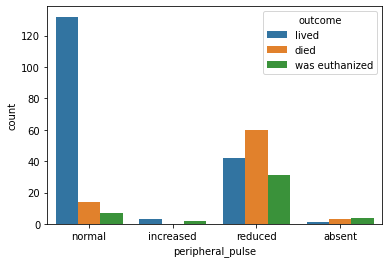

In [ ]:
g = sns.countplot(data=df_clean, x="peripheral_pulse", hue = "outcome" );
g.set_xticklabels(['normal','increased', 'reduced', 'absent']);                                               
plt.legend(title='outcome',  labels=['lived','died','was euthanized']); 

Similar to what we can expect, most of the horses who lived have peripheral pulse in the normal range. Majority of the horses who died had reduced peripheral pulse. 

#### Finding relationship between Packed_cell_volume and outcome variable 

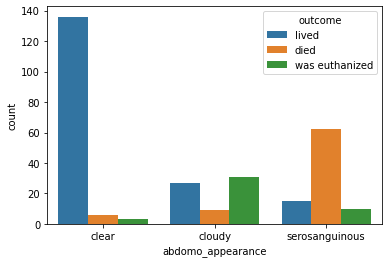

In [ ]:
g = sns.countplot(data=df_clean, x="abdomo_appearance", hue = "outcome" );
g.set_xticklabels(['clear', 'cloudy', 'serosanguinous']);                                               
plt.legend(title='outcome',  labels=['lived','died','was euthanized']); 

As given in data description, normal abdomo has a Clear appearance. Similar pattern can be observed from the above CountPlot. Most of the horses who lived had clear abdomo_appearance. 

#### Finding relationship between packed_cell_volume and outcome


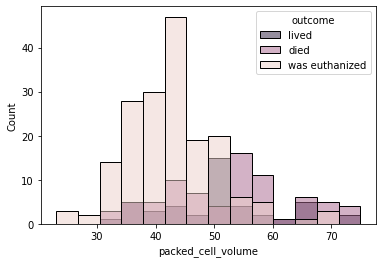

In [ ]:
_ = sns.histplot(data = df_clean, x = 'packed_cell_volume', hue="outcome")
plt.legend(title='outcome',  labels=['lived','died','was euthanized']); 

Normal range of Packed_cell_volume is 30 to 50 as given in data description. From the Histogram we can observe that those horses who have packed_cell_volume in normal range survived while those who have higer cell_volume died. 

#### Finding relationship between Packed_cell_volume and outcome

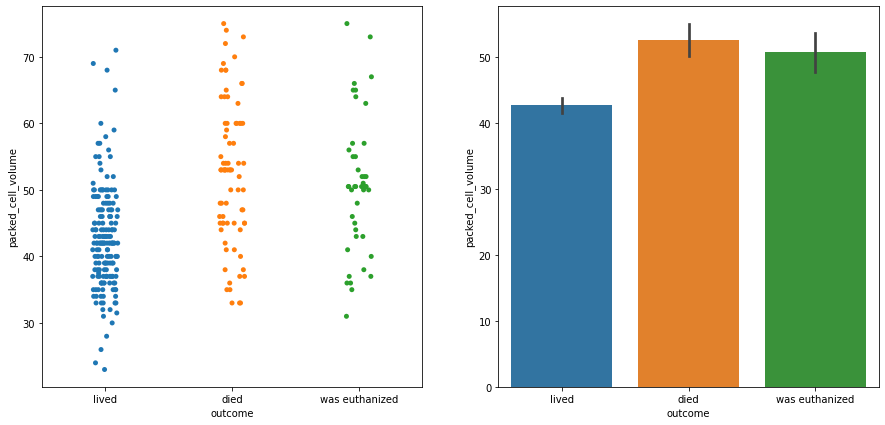

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
g = sns.stripplot(data=df_clean, y="packed_cell_volume", x = "outcome", ax=axes[0] );
g.set_xticklabels(['lived','died','was euthanized']); 
g = sns.barplot(data=df_clean, x="outcome", y="packed_cell_volume", ax=axes[1]  );
g.set_xticklabels(['lived','died','was euthanized']); 

From the above graphs we can observe that most of the horses who lived had lower packed_cell_volume and those who died had higher. The bar graph shows the mean value of packed_cell_volume for each class. 

#### Finding relationship between Peripheral_pulse and pulse

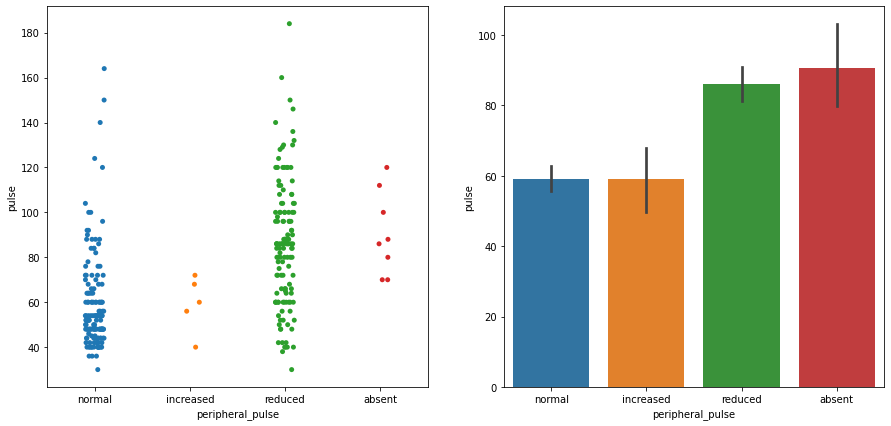

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
g = sns.stripplot(data=df_clean, y="pulse", x = "peripheral_pulse", ax=axes[0] );
g.set_xticklabels(['normal', 'increased', 'reduced', 'absent' ]);
g = sns.barplot(data=df_clean, x="peripheral_pulse", y="pulse" , ax=axes[1] );
g.set_xticklabels(['normal', 'increased', 'reduced', 'absent' ]);

From the above graphs we can observe that those horses having normal or increased peripheral pulse have pulse in the normal range as well. While those have reduced and absent peripheral pulse have pulse in higher range 

#### Finding relationship between mucous_membrane and pulse

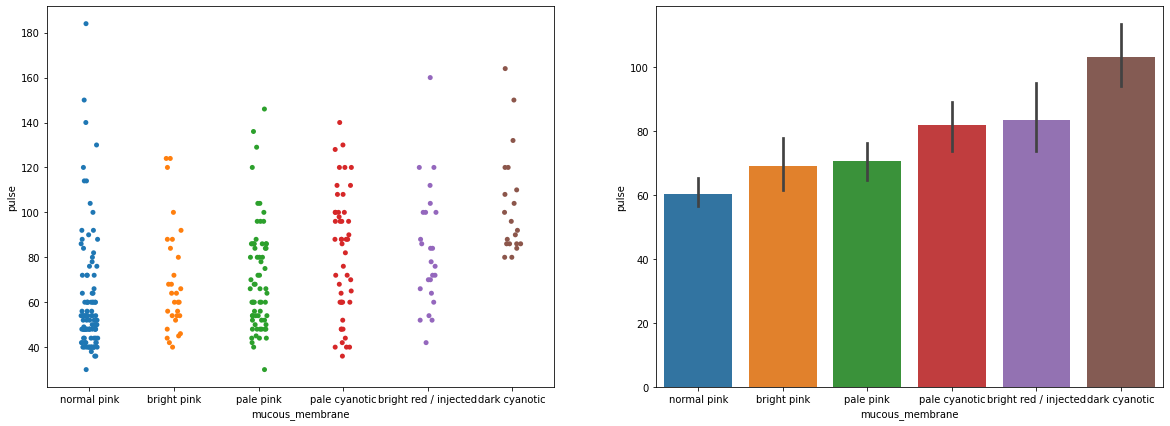

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(20,7))
g = sns.stripplot(data=df_clean, x = "mucous_membrane" ,y="pulse", ax=axes[0] );
g.set_xticklabels(['normal pink', 'bright pink', 'pale pink', 'pale cyanotic', 
                    'bright red / injected', 'dark cyanotic' ]);
g = sns.barplot(data=df_clean, x="mucous_membrane", y="pulse" , ax=axes[1] );
g.set_xticklabels(['normal pink', 'bright pink', 'pale pink', 'pale cyanotic', 
                    'bright red / injected', 'dark cyanotic' ]);

Normal pink and bright pink mucous_membrane indicates normal circulation. The other types indicate compromised circulation. Dark cynotic indicates highly compromised circulation hence the mean pulse is the highest as seen from the graph

#### Finding relationship between mucous_membrane and packed_cell_volume

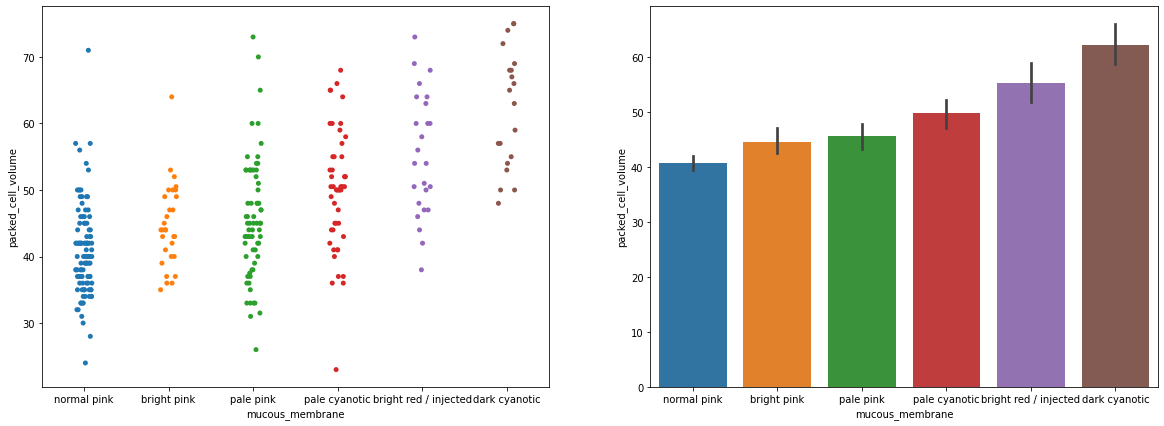

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(20,7))
g = sns.stripplot(data=df_clean, x = "mucous_membrane" ,y="packed_cell_volume", ax=axes[0] );
g.set_xticklabels(['normal pink', 'bright pink', 'pale pink', 'pale cyanotic', 
                    'bright red / injected', 'dark cyanotic' ]);
g = sns.barplot(data=df_clean, x="mucous_membrane", y="packed_cell_volume" , ax=axes[1] );
g.set_xticklabels(['normal pink', 'bright pink', 'pale pink', 'pale cyanotic', 
                    'bright red / injected', 'dark cyanotic' ]);

Normal pink and bright pink mucous_membrane indicates normal level of packed_cell_volume. Dark cynotic indicates highly level of packed_cell_volume as seen from graph

In [ ]:
df_clean.head()

,pulse,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,rectal_exam_feces,packed_cell_volume,abdomo_appearance,outcome,surgical_lesion
0,66.0,2,2,2,1,4,3,3,2,45.0,2,1,1
1,88.0,2,2,3,0,2,3,1,3,50.0,1,2,1
2,40.0,0,0,2,0,2,2,0,0,33.0,0,0,1
3,164.0,3,0,5,1,1,3,3,2,48.0,2,1,0
4,104.0,2,2,5,1,4,2,2,3,74.0,2,1,1


### Data Encoding 

In [ ]:
from sklearn import preprocessing                                               
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold                     
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
df_pre = df_clean.copy()

In [ ]:
df_pre.head()

,pulse,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,rectal_exam_feces,packed_cell_volume,abdomo_appearance,outcome,surgical_lesion
0,66.0,2,2,2,1,4,3,3,2,45.0,2,1,1
1,88.0,2,2,3,0,2,3,1,3,50.0,1,2,1
2,40.0,0,0,2,0,2,2,0,0,33.0,0,0,1
3,164.0,3,0,5,1,1,3,3,2,48.0,2,1,0
4,104.0,2,2,5,1,4,2,2,3,74.0,2,1,1


Splitting the data into Train and test for model training. 80% training data and 20% testing data

In [ ]:
y = df_pre["outcome"] 
X = df_pre.drop(["outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 53)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((239, 12), (239,), (60, 12), (60,))

Since we have categorical columns, we need to label Encode them so that they can be used in the model

In [ ]:
le = preprocessing.LabelEncoder()
for col in ['temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'rectal_exam_feces','abdomo_appearance',
       'surgical_lesion']:                                                      

    trained_le = le.fit(X_train[col])
    X_train[col] = trained_le.transform(X_train[col])                           
    X_test[col] = trained_le.transform(X_test[col])

train_le = le.fit(y_train)
y_train = train_le.transform(y_train)
y_test = train_le.transform(y_test)

### Model Training

Initializing Logistic Regression Model

In [ ]:
logisticRegr = LogisticRegression(max_iter=10000)     

Fitting the Baseline Model

In [ ]:
logisticRegr.fit(X_train, y_train)                                              

LogisticRegression(max_iter=10000)

In [ ]:
print(f'Accuracy on Training data: {logisticRegr.score(X_train, y_train) * 100} %')

Accuracy on Training data: 81.17154811715481 %


In [ ]:
print(f'Accuracy on Test Data: {logisticRegr.score(X_test, y_test) * 100} %')

Accuracy on Test Data: 80.0 %


### Model Evaluation

In [ ]:
from sklearn.metrics import classification_report
y_pred_LRC = logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred_LRC))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.69      0.69      0.69        16
           2       0.62      0.56      0.59         9

    accuracy                           0.80        60
   macro avg       0.73      0.72      0.73        60
weighted avg       0.80      0.80      0.80        60



Here we can see that Accuracy of the Baseline Model is 80% on Testing Data. We can improve the model performance by tunning the hyperparameters of the model

### Model Tuning using Grid Search CV

In [ ]:
grid = [
  {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'multi_class': ['ovr'] },
  {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'], 'solver': ['lbfgs','newton-cg', 'sag'], 'multi_class': ['ovr', 'multinomial']},
  {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'], 'solver': ['saga'], 'multi_class': ['ovr', 'multinomial'] },
 ]

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
grid_search = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [ ]:
print(f"Best Params: {grid_result.best_params_}")

Best Params: {'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}


#### Using the Best Params obtained from Grid Search CV to Train the Model

In [ ]:
logisticRegr = LogisticRegression(C= 1.0, multi_class = 'ovr', penalty ='l1', solver = 'liblinear') 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 46)

In [ ]:
logisticRegr.fit(X_train, y_train)       

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
print(f'Accuracy on Test data after tuning: {round(logisticRegr.score(X_test, y_test), 4) *100} %')

Accuracy on Test data after tuning: 83.33 %


Accuracy of 83% is obtained on Testing Data after tuning the model

#### Plotting the ROC Curve for the Tuned Model

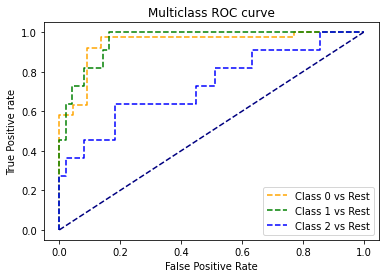

In [ ]:
probs = logisticRegr.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, probs[:, i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [ ]:
y_pred_LRC = logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred_LRC))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.61      1.00      0.76        11
           2       0.80      0.36      0.50        11

    accuracy                           0.83        60
   macro avg       0.79      0.76      0.73        60
weighted avg       0.86      0.83      0.82        60



### Conclusion



1.   Finding the correlation between features is necessary in order to select only those features which are most useful for prediction.
2.   Histogram is useful to understand the data distribution which is necessary for handling missing values. 
3. Logistic regression gives the probability that a sample belongs to a particular class. 
4.   Model performance can be improved by Hyperparamter tuning. 